# Project 2. Food Delivery System.

Problem Statement:
- In the competitive food delivery industry, businesses often struggle to understand and
engage their diverse user base effectively. Users differ widely in terms of age, spending
habits, order frequency, app usage, and preferences. Without segmenting these users into
meaningful groups, companies miss opportunities to personalize marketing, improve user
satisfaction, and increase retention.
Project Goal:
- The goal of this project is to segment users of a food delivery app into meaningful
clusters based on their behavior and demographics using unsupervised learning techniques.
By identifying distinct customer groups, the business can tailor marketing campaigns,
improve service offerings, and optimize customer engagement strategies.
__________________________
Learning Objectives
Data Understanding & Exploration
1. Load and inspect food delivery user data to understand variable types (e.g., numeric
vs. categorical), ranges, and distributions.

2. Summarize and interpret key statistical properties (mean, median, standard
deviation, skewness) of user behavior features like Age, Total Orders, Average
Spend, etc.

3. Visualize data distributions using histograms, box plots, and pair plots to explore
potential groupings or outliers.

4. Identify relationships between user variables (e.g., App Usage Time and Average
Spend) through correlation matrices and scatter plots.
Data Cleaning & Preprocessing


5. Drop or encode irrelevant or categorical features (e.g., UserID, FavoriteCuisine) as
appropriate for unsupervised learning models.

6. Standardize numerical features using StandardScaler to ensure equal contribution to
distance-based clustering.

7. Evaluate the effect of scaling and dimensionality reduction on the data’s structure
through pre- and post-processing visualizations.
Dimensionality Reduction with PCA

8. Apply Principal Component Analysis (PCA) to reduce high-dimensional data to 2D
for effective visualization of user clusters.

9. Interpret principal components by examining feature loadings to understand which
user behaviors contribute most to variance.

10. Visualize PCA-transformed data to observe potential natural clusters and separation
of user types.
Unsupervised Learning: Clustering

11. Implement K-Means clustering on scaled user data and interpret resulting clusters in
the context of user behavior.

12. Determine the optimal number of clusters using the Elbow Method or Silhouette
Score.

13. Apply Agglomerative (Hierarchical) Clustering and visualize results using
dendrograms to understand hierarchical relationships among users.

14. Compare clustering results from K-Means and Hierarchical Clustering to identify
consistency or divergence in groupings.
Model Evaluation & Visualization

15. Label PCA scatter plots with cluster assignments to visually interpret how users are
grouped in reduced dimensions.

16. Analyze cluster characteristics by computing average values of features within each
cluster (e.g., high spenders, frequent users).

17. Create a cluster profile summary to describe each segment using business-relevant
insights (e.g., “young frequent users,” “older high spenders”).
Critical Thinking & Real-world Framing

18. Frame the clustering output as a customer segmentation strategy for personalized
marketing or product recommendations.

19. Explain how unsupervised learning helps businesses make data-driven decisions in
the absence of labeled training data.

20. Reflect on limitations of clustering models (e.g., sensitivity to scaling, shape of
clusters) and suggest ways to improve (e.g., DBSCAN, inclusion of more behavioral
data).
_______________

### Importing Required Libraries

We begin by importing essential Python libraries for data analysis and visualization:
- `pandas` for data manipulation
- `numpy` for numerical operations
- `matplotlib.pyplot` and `seaborn` for visualizations

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [ ]:
df=pd.read_csv('dataset\\food_delivery.csv')

In [ ]:
#first 5 rows
df.head()

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,1,56,37,312.70,Mexican,4.6,20.9
1,2,46,34,193.97,Mexican,3.0,150.2
2,3,32,22,291.66,Mexican,4.1,59.7
3,4,25,30,232.21,Thai,3.7,85.5
4,5,38,27,244.84,Italian,4.7,13.7


### Data Overview

We use `.info()` to understand column types and missing values, and `.describe()` to view statistical summaries like mean, std, min, and max for numerical columns.

In [ ]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UserID              500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   TotalOrders         500 non-null    int64  
 3   AverageSpend        500 non-null    float64
 4   FavoriteCuisine     500 non-null    object 
 5   DeliveryRating      500 non-null    float64
 6   AppUsageTimePerDay  500 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 27.5+ KB


In [ ]:
# detailed information about the dataset
df.describe(include='all')#use include='all to get the all the information about the data regardless of the numerical or classified values

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
count,500.000000,500.000000,500.000000,500.000000,500,500.000000,500.000000
unique,NaN,NaN,NaN,NaN,5,NaN,NaN
top,NaN,NaN,NaN,NaN,Thai,NaN,NaN
freq,NaN,NaN,NaN,NaN,108,NaN,NaN
mean,250.500000,39.326000,29.714000,306.584680,NaN,3.759400,93.515400
std,144.481833,12.200386,5.747196,74.732407,NaN,0.731794,48.472478
min,1.000000,18.000000,14.000000,80.900000,NaN,2.500000,10.100000
25%,125.750000,29.000000,25.000000,256.685000,NaN,3.100000,49.325000
50%,250.500000,41.000000,30.000000,305.170000,NaN,3.800000,93.100000
75%,375.250000,50.000000,33.000000,355.870000,NaN,4.400000,137.275000


### Check for Missing Values

To ensure data quality, we check for missing values in each column using `.isnull().sum()`.

In [ ]:
# check if there are any null values in the dataset
df.isnull().sum()

UserID                0
Age                   0
TotalOrders           0
AverageSpend          0
FavoriteCuisine       0
DeliveryRating        0
AppUsageTimePerDay    0
dtype: int64

### Check for Duplicate Rows

We check how many rows in the dataset are duplicates using `.duplicated().sum()`. If there are duplicates, we can remove them to clean the dataset.

In [ ]:
# check for duplicates in the dataset
# This will help us identify if there are any repeated entries in the dataset.
print(df.duplicated().sum())

0


There are no missing values in the dataset

In [ ]:
# check the value counts of the 'FavoriteCuisine' column
# This will help us understand the distribution of favorite cuisines among the customers.
df['FavoriteCuisine'].value_counts()

FavoriteCuisine
Thai       108
Italian    106
Indian     104
Mexican     95
Chinese     87
Name: count, dtype: int64

selecting all numerical columns from the DataFrame df

This is useful when you want to perform operations like statistical analysis, plotting, or scaling only on numerical data, while ignoring non-numerical columns like strings or dates.

In [ ]:
numercial_cols = df.select_dtypes(include=['int64','float64'])

### Using Label encoder
LabelEncoder is used to convert categorical text data into numerical form. It assigns a unique integer (0, 1, 2, ...) to each unique category in a column.

Many machine learning models work only with numerical input. LabelEncoder helps by transforming labels (like 'Male', 'Female', 'Yes', 'No') into numerical values that models can understand.

le = LabelEncoder()
- Creates an instance of the LabelEncoder class.

df['FavoriteCuisine'] = le.fit_transform(df['FavoriteCuisine'])

fit_transform():

- fit: Finds all unique values in the 'FavoriteCuisine' column.

- transform: Converts each category into a numeric label (e.g., 'Italian' → 0, 'Chinese' → 1, 'Indian' → 2, etc.).

- This replaces the original string values in the column with their corresponding numeric codes.

df['FavoriteCuisine']
- Displays the newly transformed 'FavoriteCuisine' column, now with numeric labels.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['FavoriteCuisine'] = le.fit_transform(df['FavoriteCuisine'])
df['FavoriteCuisine']

0      3
1      3
2      3
3      4
4      2
      ..
495    4
496    0
497    4
498    4
499    3
Name: FavoriteCuisine, Length: 500, dtype: int64

### Correlation Matrix

A correlation matrix is a table that shows the pairwise correlation coefficients between multiple variables (usually numerical). It tells us how strongly and in what direction variables are related to each other.

[]

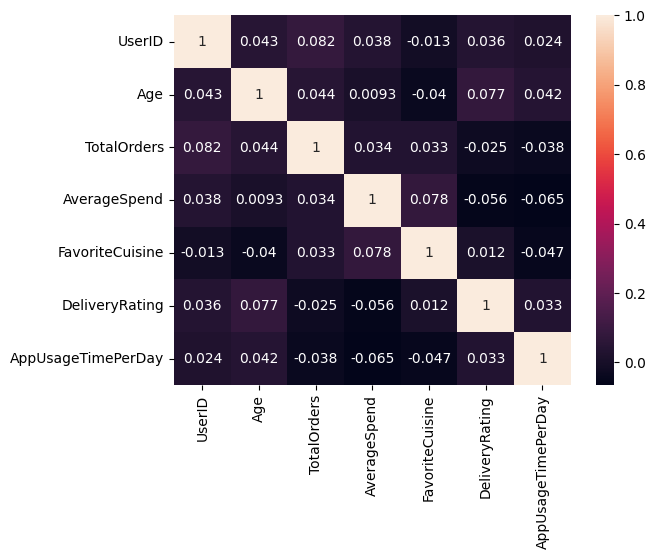

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot =True)
plt.plot()

### Keep Only Useful Columns

Irrelevant columns like 'UserID' is removed from the dataset because they do not contribute to clustering. The rest of the features, especially numerical ones, are retained for further processing. This step ensures the model focuses only on meaningful attributes.

In [ ]:
X = df.drop('UserID',axis=1)
X

,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,56,37,312.70,3,4.6,20.9
1,46,34,193.97,3,3.0,150.2
2,32,22,291.66,3,4.1,59.7
3,25,30,232.21,4,3.7,85.5
4,38,27,244.84,2,4.7,13.7
...,...,...,...,...,...,...
495,56,30,398.62,4,4.3,150.7
496,49,27,423.00,0,3.6,39.0
497,41,31,355.66,4,3.6,15.2
498,40,29,305.66,4,4.1,44.8


### Standardize Your Data

Standardization is applied to scale the data so that all features contribute equally to the clustering algorithms. This process transforms the data to have a mean of 0 and standard deviation of 1. Without scaling, features with larger ranges may dominate the clustering process.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

### Reduce Dimensions Using PCA

Principal Component Analysis (PCA) is applied to reduce the dataset to two dimensions. This is done to visualize high-dimensional data in 2D space. PCA also helps to remove redundancy in data by combining correlated features into principal components.

Why Use PCA?
Too many features can lead to:

- Slow model performance

- Overfitting

- Difficulty in visualization

PCA helps by:

- Removing redundant or correlated features

- Making the data easier to visualize (2D or 3D)

- Improving model speed and sometimes accuracy



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_scaled)

### Group Users Using KMeans Clustering

KMeans is an unsupervised machine learning algorithm used to group similar data points into clusters. In this step, the standardized dataset is grouped into 3 clusters using KMeans. The output is a label for each user indicating which cluster they belong to.

- KMeans: Partitions data into k distinct non-overlapping groups.
- AgglomerativeClustering: A type of hierarchical clustering that builds nested clusters by merging or splitting them.
- DBSCAN: Density-Based Spatial Clustering that groups points close to each other and marks outliers as noise.

In [ ]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
kmeans = KMeans(n_clusters =3)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [ ]:
centriod_pca = pca.transform(kmeans.cluster_centers_)

### Visualize the Clusters Using a Scatter Plot

The PCA-reduced data is plotted in a 2D scatter plot where each point represents a user. Different colors represent different clusters found by KMeans. This visual helps in understanding how well the clusters are separated in the feature space.


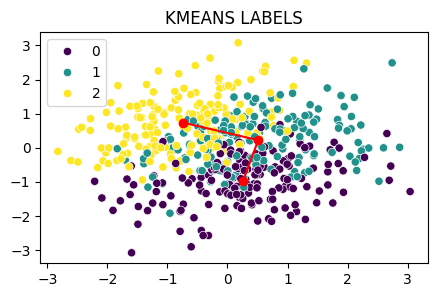

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue = kmeans_labels,palette="viridis")
plt.plot(centriod_pca[:,0],centriod_pca[:,1],color='red',marker='o')
plt.title("KMEANS LABELS")
plt.show()

### Group Users with Agglomerative Clustering

 Clustering with Agglomerative Clustering
What is Agglomerative Clustering?
- Agglomerative Clustering is a type of hierarchical clustering that builds clusters in a bottom-up approach:
- Each data point starts as its own cluster.
- Closest clusters are merged step-by-step.
- The process continues until the desired number of clusters (n_clusters) is reached.

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

### Visualize Clusters Using Agglomerative Clustering

A scatter plot is created to visualize the output from Agglomerative Clustering. Each user is shown as a point in PCA space, colored according to the cluster they belong to. This plot helps compare the performance of Agglomerative Clustering with KMeans.


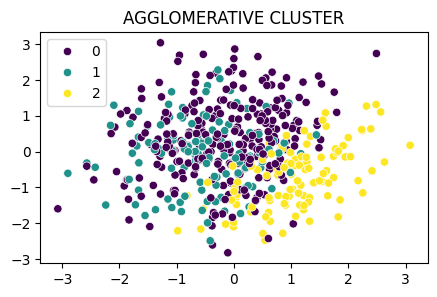

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=x_pca[:,1],y=x_pca[:,0],hue=agglo_labels,palette="viridis")
plt.title("AGGLOMERATIVE CLUSTER")
plt.show()

### Build a Dendrogram to Visualize Cluster Formation

A dendrogram is a tree-like diagram that shows the merging of clusters at each step in hierarchical clustering. It helps to understand how clusters are formed and can be used to decide the optimal number of clusters by observing where large vertical gaps exist.


- linkage: Computes the linkage matrix, which encodes the hierarchical clustering steps.

Computes the linkage matrix using the 'ward' method:
- The Ward method minimizes the variance within clusters when merging.
- It is well-suited for Euclidean distance-based clustering.

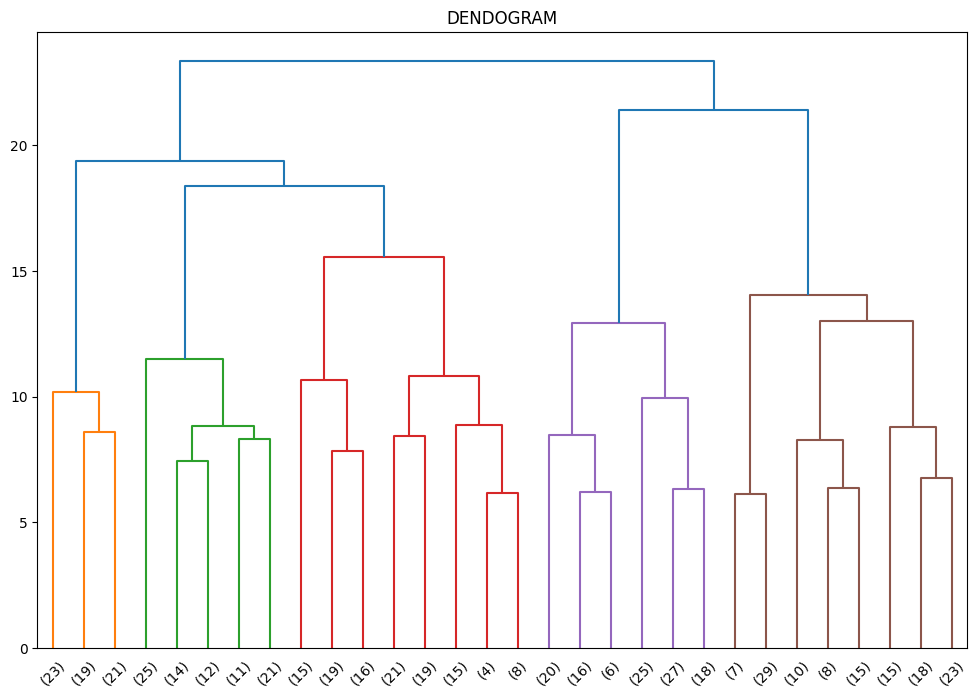

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(12,8))
link = linkage(X_scaled,method='ward')
dendrogram(link,p=30,truncate_mode='lastp')
plt.title("DENDOGRAM")
plt.show()

### Discover User Patterns with DBSCAN Clustering
- What is DBSCAN?
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are close to each other based on a distance metric, and labels points in low-density areas as noise (outliers).
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is applied to identify clusters of users based on data density. Unlike KMeans, DBSCAN can find arbitrarily shaped clusters and can also detect outliers as noise points.


In [ ]:
db = DBSCAN(eps=1.5,min_samples=5)
db_labels = db.fit_predict(X_scaled)

In [ ]:
# Count number of clusters (excluding noise)
n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
print("Number of clusters formed by DBSCAN:", n_clusters)

Number of clusters formed by DBSCAN: 1


In [ ]:
print("Unique labels:", np.unique(db_labels))

Unique labels: [-1  0]


In [ ]:
from collections import Counter
label_counts = Counter(db_labels)
print("Label Counts:", label_counts)

Label Counts: Counter({np.int64(0): 456, np.int64(-1): 44})


In [ ]:
# Count outliers (label = -1)
n_outliers = list(db_labels).count(-1)
print("Number of outliers (noise points):", n_outliers)

Number of outliers (noise points): 44


### Visualize DBSCAN Clustering with a Scatter Plot

The results of DBSCAN clustering are visualized using a 2D scatter plot of PCA components. Each point is colored by its cluster label. Noise points, which do not belong to any cluster, are typically shown in a separate color (e.g., gray or black).


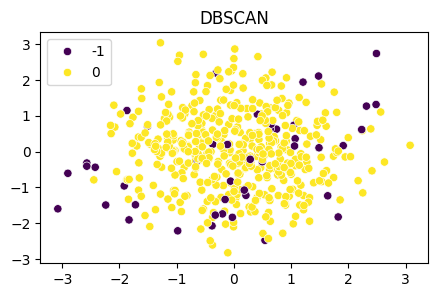

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=x_pca[:,1],y=x_pca[:,0],hue=db_labels,palette="viridis")
plt.title("DBSCAN")
plt.show()

### Final Conclusion

Through this project, unsupervised machine learning methods were effectively employed to uncover meaningful customer segments in a food delivery platform. The process began with thorough data preprocessing—handling missing values, encoding categorical data, and applying feature scaling to ensure robust model performance.

Principal Component Analysis (PCA) was used to simplify the complexity of high-dimensional data while retaining critical behavioral patterns. This dimensionality reduction allowed clearer visualization and interpretation of the data’s inherent structure.

Three clustering algorithms—KMeans, Agglomerative Clustering, and DBSCAN—were applied and compared. Each brought unique value:

- KMeans provided well-defined user clusters efficiently.

- Agglomerative Clustering offered hierarchical insight into user relationships.

- DBSCAN stood out by identifying non-linear clusters and isolating noise or outlier users.

The analysis revealed significant variation in user engagement, spending habits, and preferences. These insights empower businesses to tailor their strategies—from personalized promotions to feature development—ultimately enhancing customer satisfaction and retention.